In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [1]:
data = pd.read_csv(#ENTER FILENAME HERE)
    
    
#Giving you column names to make it easy for you
x_columns = ["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income"]
y_column = ["median_house_value"]

#DROP NAN ROWS HERE

NameError: name 'pd' is not defined

# Data Cleaning and Feature Creation

In [3]:
# Making Features from categorical variables
# If you can see the dataframe, it's obvious that our algorithm can't take in the column ocean_proximity, 
# since it isn't in the form of numbers, which is the input to our linear equation. 
# Let's do a simple transformation and turn this into a simple binary classification

In [4]:
#Normalizing Vectors 

#Task: Implement min/max data normalization on continous data 
#Inputs: Dataframe and list of column names which you want to normalize
#Outputs: Dataframe with normalized columns

# Pseudocode data_normalized = data / max of data


def normalize_data(df,columns):
    #Empty dataframe
    normalized_df = pd.DataFrame()
    
    #ENTER CODE HERE
    
    
    return normalized_df

In [5]:
norm_data = normalize_data(data,["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income"])

In [6]:
#turn normalized data into a numpy array that we can do things with these values
x = norm_data.values
y = data["median_house_value"].values

# Training our Model

In [63]:
#Setting up hyperparameters

#Alpha is our learning rate, I'll explain this later
alpha = 0.1

iterations = 10000
#Iterations is how many times we will run our algorithm

In [8]:
# Note: np.dot() is simply matrix and vector multiplication, while np.inner() is the standard definition of dot product

def train(x,y,iterations,alpha):
    #Setting up variables
    
    #Storing our cost function, Mean Squared Error
    history = []
    
    #Finding the number of weights we need and also the number of samples
    num_weights = #Find the number of weights for 
    n = #Find the number of samples in the dataset
    
    #Initializing our weights to random numbers
    np.random.seed(69420)
    weights = #initialize weights
    
    #iterating through each training step
    for i in range(iterations):
        
        #testing the model and finding the error
        predictions = #MAKE PREDICTIONS BASED ON THE CURRENT WEIGHTS
        error = #CALCULATE THE ERROR 
        
        #finding the mean squared error of the current weights and then add it to our mse list
        mse = #CALCULATE MEAN SQUARED ERROR
        history.append(mse)
        
        #finding the gradient and then defining the new weights using this gradient
        gradient = #CALCULATE THE GRADIENT
        weights = #COMPUTE THE NEW WEIGHTS 
    
    return weights,history    

In [9]:
weights,history = train(x,y,iterations, alpha)

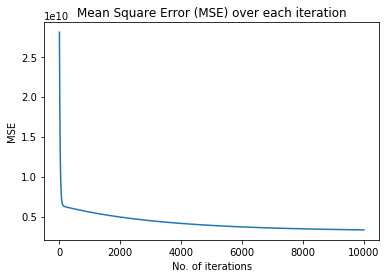

In [10]:
plt.title('Root Mean Square Error (MSE) over each iteration')
plt.xlabel('No. of iterations')
plt.ylabel('RMSE')
plt.plot(history)
plt.show()

In [11]:
#Finding MSE
n = x.shape[0]

predictions = np.inner(x,weights)
error = predictions - y
average_error =  np.sum(abs(error)) / n
average_error

62051.65300717327

# Adding a bias term

In [64]:
ones = np.ones((np.shape(x)[0],1))
x = np.hstack((ones,x))

In [65]:
weights,history = train(x,y,iterations, alpha)

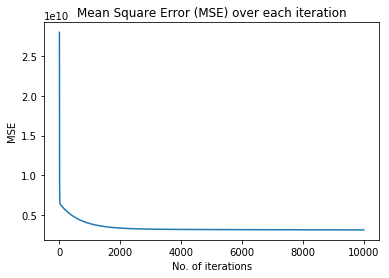

In [58]:
plt.title('Mean Square Error (MSE) over each iteration')
plt.xlabel('No. of iterations')
plt.ylabel('MSE')
plt.plot(history)
plt.show()

In [66]:
#Finding Average Error

predictions = np.inner(x,weights)
error = predictions - y
average_error =  np.sum(abs(error)) / n
average_error

57882.9540084355

In [67]:
y

array([452600., 358500., 352100., ...,  92300.,  84700.,  89400.])

# Binary Classification

In [48]:
#Greater than amount, gets label 1, lesser than gets -1
def apply_binary(y,num):
    y_binary = np.zeros_like(y)
    for idx, sample in enumerate(y):
        if sample > num:
            y_binary[idx] = 1
        else:
            y_binary[idx] = -1
    return y_binary     

In [49]:
y

array([452600., 358500., 352100., ...,  92300.,  84700.,  89400.])

In [50]:
y_binary = apply_binary(y,200000)

In [68]:
weights,history = train(x,y_binary,iterations, alpha)

In [69]:
classifications = np.sign(np.inner(x,weights))

In [79]:
 np.mean(classifications == y_binary) 

0.7925904174619488

In [72]:
from sklearn import linear_model

In [75]:
clf = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
clf.fit(x, y_binary)
predicted = clf.predict(x)
np.mean(predicted == y_binary)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)